<a href="https://colab.research.google.com/github/anandkc812/data-analytics/blob/master/RandomForest_CrediCardFraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import pandas as pd


drive.mount('/content/gdrive')

!unzip -q gdrive/'My Drive'/data/creditcardfraud.zip
cf_data = pd.read_csv('creditcard.csv')




Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:

import matplotlib.pyplot as plt

print(cf_data)

index = pd.Index(cf_data.Class)
index.value_counts()

positive_idx = []
negative_idx = []
for t in range(index.size):
  if index.array[t] == 0:
    positive_idx.append(t)
  else:
    negative_idx.append(t)


print("negative cases", negative_idx)



            Time         V1         V2  ...       V28  Amount  Class
0            0.0  -1.359807  -0.072781  ... -0.021053  149.62      0
1            0.0   1.191857   0.266151  ...  0.014724    2.69      0
2            1.0  -1.358354  -1.340163  ... -0.059752  378.66      0
3            1.0  -0.966272  -0.185226  ...  0.061458  123.50      0
4            2.0  -1.158233   0.877737  ...  0.215153   69.99      0
...          ...        ...        ...  ...       ...     ...    ...
284802  172786.0 -11.881118  10.071785  ...  0.823731    0.77      0
284803  172787.0  -0.732789  -0.055080  ... -0.053527   24.79      0
284804  172788.0   1.919565  -0.301254  ... -0.026561   67.88      0
284805  172788.0  -0.240440   0.530483  ...  0.104533   10.00      0
284806  172792.0  -0.533413  -0.189733  ...  0.013649  217.00      0

[284807 rows x 31 columns]
negative cases [541, 623, 4920, 6108, 6329, 6331, 6334, 6336, 6338, 6427, 6446, 6472, 6529, 6609, 6641, 6717, 6719, 6734, 6774, 6820, 6870, 6882

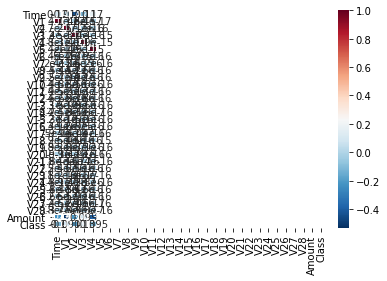

In [8]:


import seaborn as sb
import numpy as np


pearsoncorr = cf_data.corr(method='pearson')
#print(pearsoncorr(V1))

X = np.array([pearsoncorr.V1, pearsoncorr.V2, pearsoncorr.V3,pearsoncorr.V4,pearsoncorr.V5])
X = X.T


sb.heatmap(X, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=2.0)

In [33]:
data_ = cf_data.iloc[:,1:29]
data = pearsoncorr = data_.corr(method='pearson')
print("Pearson-Correlation ")

#data = pearsoncorr.iloc[2:,2:]
print(data.iloc[:, 1])

print("---------------------------------")

max_idx = np.argpartition(data.iloc[:, 1], -4)[-4:]




Pearson-Correlation 
V1     4.697350e-17
V2     1.000000e+00
V3     2.512175e-16
V4    -1.126388e-16
V5    -2.039868e-16
V6     5.024680e-16
V7     3.966486e-16
V8    -4.413984e-17
V9    -5.728718e-17
V10   -4.782388e-16
V11    9.468995e-16
V12   -6.588252e-16
V13    3.854521e-16
V14   -2.541036e-16
V15    2.831060e-16
V16    4.934097e-17
V17   -9.883008e-16
V18    2.636654e-16
V19    9.528280e-17
V20   -9.309954e-16
V21    8.444409e-17
V22    2.500830e-16
V23    1.059562e-16
V24   -8.142354e-18
V25   -4.261894e-17
V26    2.601622e-16
V27   -4.478472e-16
V28   -3.676415e-16
Name: V2, dtype: float64
---------------------------------


history max: [V28    9.820892e-16
V7     1.991550e-15
V3    -1.424390e-15
V1     1.000000e+00
Name: V1, dtype: float64, V20   -9.309954e-16
V11    9.468995e-16
V2     1.000000e+00
V17   -9.883008e-16
Name: V2, dtype: float64, V6    1.431581e-15
V5   -1.436514e-15
V3    1.000000e+00
V7    2.168574e-15
Name: V3, dtype: float64, V26   -6.179751e-16
V16   -6.939204e-16
V5    -1.940929e-15
V4     1.000000e+00
Name: V4, dtype: float64, V18    1.109525e-15
V3    -1.436514e-15
V4    -1.940929e-15
V5     1.000000e+00
Name: V5, dtype: float64, V25    1.081933e-15
V6     1.000000e+00
V3     1.431581e-15
V24   -1.261867e-15
Name: V6, dtype: float64, V12    1.510045e-15
V3     2.168574e-15
V7     1.000000e+00
V1     1.991550e-15
Name: V7, dtype: float64, V19   -5.339821e-16
V22    5.475559e-16
V5     7.589187e-16
V8     1.000000e+00
Name: V8, dtype: float64, V26   -1.388725e-15
V15   -1.588105e-15
V12   -2.445230e-15
V9     1.000000e+00
Name: V9, dtype: float64, V12    1.439907e-15
V10    1.000000e

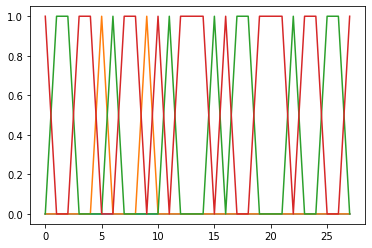

In [73]:
#print(data.iloc[:, 1])


#print("---------------------------------")
def largest_indices(ary, n):
    """Returns the n largest indices from a numpy array."""
    flat = ary #.flatten()
    indices = np.argpartition(flat, -n)[-n:]
    indices = indices[np.argsort(-flat[indices])]
    return  np.unravel_index(indices, ary.shape)


def find_maxmin_corr(datap, idx):

    #val = largest_indices(datap.iloc[:, idx],4)
    #print(val)
    #print(val, datap.iloc[idx,val.flatten()])

    max_idx = np.argpartition(abs(datap.iloc[:, idx]), -4)[-4:]
    min_idx = np.argpartition(abs(datap.iloc[:, idx]), 4)[:4]
    #print("Max - Idx  ------::: ----MIN IDX ")

    #print( datap.iloc[idx,max_idx[0:4]], datap.iloc[idx,min_idx[0:5]] )
    return [max_idx, min_idx], [datap.iloc[idx,max_idx[0:4]], datap.iloc[idx,min_idx[0:5]]]
    #print(datap.iloc[:, 1])

rmax_history = []
rmin_history = []
#[max_index, min_index], [max_val, min_val] = find_maxmin_corr(data, 1)
#rmax_history.append(max_val)
#rmin_history.append(min_val)

for idx in range(28):
  [max_index, min_index], [max_val, min_val] = find_maxmin_corr(data, idx)
  rmax_history.append(max_val)
  rmin_history.append(min_val)

print("history max:", rmax_history)
print("history min:", rmin_history)

plt.plot(list(rmax_history))
plt.show()
#print(data.iloc[1,max_idx[1,:]])

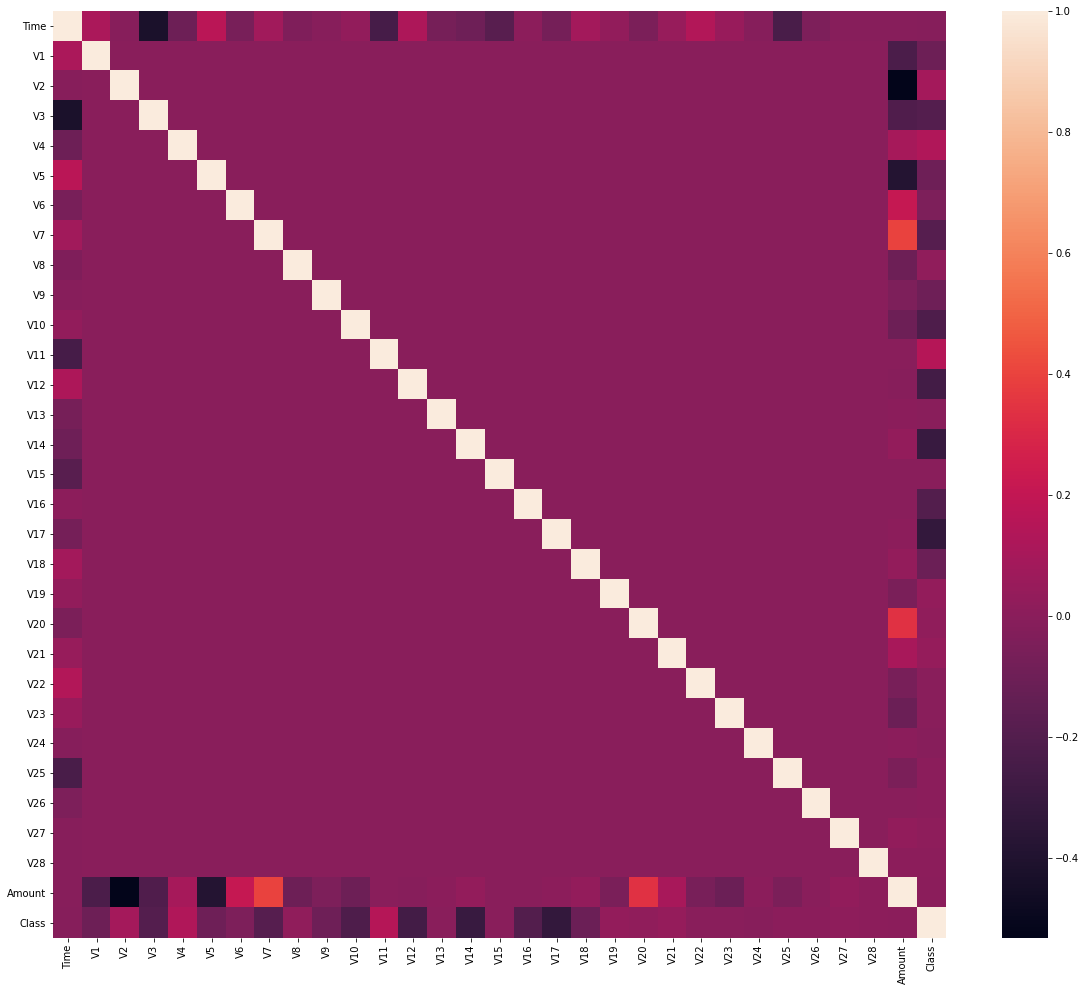

In [16]:
# get the tick label font size
import seaborn as sns

fontsize_pt = plt.rcParams['ytick.labelsize']
dpi = 72.27

data = pearsoncorr
# comput the matrix height in points and inches
matrix_height_pt = float(30.0) * data.shape[0]
matrix_height_in = float(matrix_height_pt) / dpi

# compute the required figure height 
top_margin = 0.04  # in percentage of the figure height
bottom_margin = 0.04 # in percentage of the figure height
figure_height = matrix_height_in / (1 - top_margin - bottom_margin)


# build the figure instance with the desired height
fig, ax = plt.subplots(
        figsize=(20,figure_height), 
        gridspec_kw=dict(top=1-top_margin, bottom=bottom_margin))

# let seaborn do it's thing
ax = sns.heatmap(data, ax=ax)


In [6]:


X = np.array([cf_data.V1, cf_data.V2, cf_data.V3,cf_data.V4,cf_data.V5])
X = X.T

Y = cf_data.Class

print(X.shape)

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y,
                                                random_state=0)
model = RandomForestClassifier(n_estimators=100)
model.fit(Xtrain, ytrain)
#ypred = model.predict(Xtest)





(284807, 5)


KeyboardInterrupt: ignored

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71128
           1       0.54      0.88      0.67        74

    accuracy                           1.00     71202
   macro avg       0.77      0.94      0.83     71202
weighted avg       1.00      1.00      1.00     71202



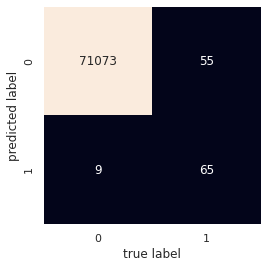

In [0]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()
from sklearn import metrics

ypred = model.predict(Xtest)

print(metrics.classification_report(ypred, ytest))
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');


In [0]:


print(X.shape)

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()
from sklearn import metrics

def random_forest_test(X,Y, estimators):
  Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y,
                                                  random_state=0)
  model = RandomForestClassifier(n_estimators=estimators)
  model.fit(Xtrain, ytrain)

  ypred = model.predict(Xtest)

  report = print(metrics.classification_report(ypred, ytest))
  mat = confusion_matrix(ytest, ypred)
  sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
  plt.xlabel('true label')
  plt.ylabel('predicted label');
  return report, mat


X = np.array([cf_data.V1, cf_data.V2, cf_data.V3,cf_data.V4,cf_data.V5])
X = X.T

Y = cf_data.Class
#random_forest_test(X,Y, 100)




(284807, 20)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71133
           1       0.54      0.94      0.69        69

    accuracy                           1.00     71202
   macro avg       0.77      0.97      0.84     71202
weighted avg       1.00      1.00      1.00     71202



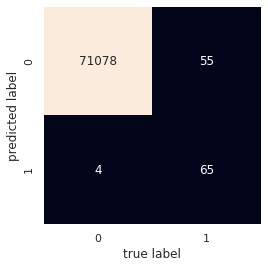

In [0]:
X = np.array([cf_data.V1, cf_data.V2, cf_data.V3,cf_data.V4,cf_data.V5, cf_data.V6, cf_data.V7])
X = X.T
random_forest_test(X,Y, 100)



              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71127
           1       0.58      0.93      0.72        75

    accuracy                           1.00     71202
   macro avg       0.79      0.97      0.86     71202
weighted avg       1.00      1.00      1.00     71202



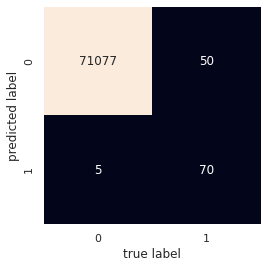

In [0]:
X = np.array([cf_data.V1, cf_data.V2, cf_data.V3,cf_data.V4,cf_data.V5, cf_data.V6, cf_data.V7])
X = X.T
random_forest_test(X,Y, 300)



              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71128
           1       0.57      0.92      0.70        74

    accuracy                           1.00     71202
   macro avg       0.78      0.96      0.85     71202
weighted avg       1.00      1.00      1.00     71202



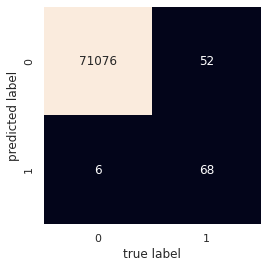

In [0]:
X = np.array([cf_data.V1, cf_data.V2, cf_data.V3,cf_data.V4,cf_data.V5, cf_data.V6, cf_data.V7])
X = X.T
random_forest_test(X,Y, 50)



              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71140
           1       0.48      0.94      0.64        62

    accuracy                           1.00     71202
   macro avg       0.74      0.97      0.82     71202
weighted avg       1.00      1.00      1.00     71202



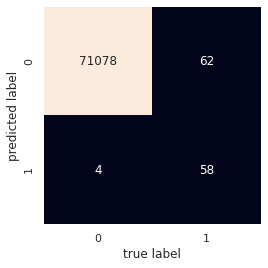

In [0]:
X = np.array([cf_data.V1, cf_data.V2, cf_data.V3,cf_data.V4,cf_data.V5, cf_data.V6, cf_data.V7])
X = X.T
random_forest_test(X,Y, 30)




              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71112
           1       0.70      0.93      0.80        90

    accuracy                           1.00     71202
   macro avg       0.85      0.97      0.90     71202
weighted avg       1.00      1.00      1.00     71202



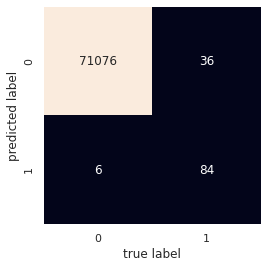

In [0]:
X = np.array([cf_data.V1, cf_data.V2, cf_data.V3,cf_data.V4,cf_data.V5, cf_data.V6, cf_data.V7, cf_data.V8, cf_data.V9, cf_data.V10])
X = X.T
random_forest_test(X,Y, 30)



(284807, 20)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71104
           1       0.78      0.95      0.85        98

    accuracy                           1.00     71202
   macro avg       0.89      0.97      0.93     71202
weighted avg       1.00      1.00      1.00     71202



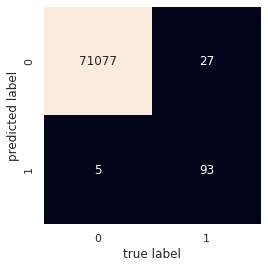

In [0]:

X = np.array([cf_data.V1, cf_data.V2, cf_data.V3,cf_data.V4,cf_data.V5, cf_data.V6, cf_data.V7, cf_data.V8, cf_data.V9, cf_data.V10, cf_data.V11, cf_data.V12, cf_data.V13,cf_data.V14,cf_data.V15, cf_data.V16, cf_data.V17, cf_data.V18, cf_data.V19, cf_data.V20])


X = X.T
print(X.shape)
random_forest_test(X,Y, 30)



(284807, 20)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71100
           1       0.79      0.93      0.86       102

    accuracy                           1.00     71202
   macro avg       0.90      0.97      0.93     71202
weighted avg       1.00      1.00      1.00     71202



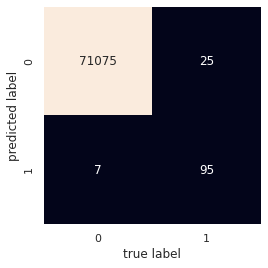

In [0]:
history_mat = []
history_report = []

X = np.array([cf_data.V1, cf_data.V2, cf_data.V3,cf_data.V4,cf_data.V5, cf_data.V6, cf_data.V7, cf_data.V8, cf_data.V9, cf_data.V10, cf_data.V11, cf_data.V12, cf_data.V13,cf_data.V14,cf_data.V15, cf_data.V16, cf_data.V17, cf_data.V18, cf_data.V19, cf_data.V20])


X = X.T
print(X.shape)
report, mat = random_forest_test(X,Y, 30)
history_mat.append(mat)
history_report.append(report)



ERROR! Session/line number was not unique in database. History logging moved to new session 62
(284807, 28)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71104
           1       0.76      0.93      0.83        98

    accuracy                           1.00     71202
   macro avg       0.88      0.96      0.92     71202
weighted avg       1.00      1.00      1.00     71202



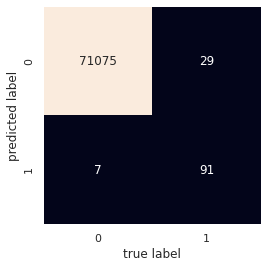

In [0]:
history_mat = []
history_report = []

X = np.array([cf_data.V1, cf_data.V2, cf_data.V3,cf_data.V4,cf_data.V5, cf_data.V6, cf_data.V7, cf_data.V8, cf_data.V9, cf_data.V10,
              cf_data.V11, cf_data.V12, cf_data.V13,cf_data.V14,cf_data.V15, cf_data.V16, cf_data.V17, cf_data.V18, cf_data.V19, cf_data.V20, 
             cf_data.V21, cf_data.V22, cf_data.V23,cf_data.V24,cf_data.V25, cf_data.V26, cf_data.V27, cf_data.V28])


X = X.T
print(X.shape)
report, mat = random_forest_test(X,Y, 30)
history_mat.append(mat)
history_report.append(report)


In [0]:
print(report)

None


In [0]:
import numpy as np
 
def plot_var(V, V_legend):

  x_1 = V.array[positive_idx]
  y_1 = V.array[negative_idx]
  maxval = max(V)
  fig = plt.figure()

  ax = fig.add_subplot(111)

  ax.set(title="Credit Card Fraud Data - "+V_legend, label="Positive")

  xaxis = np.linspace(0,maxval, max(x_1.shape))
  ax.scatter(list(xaxis) , list(x_1),label="Positive", c='b', marker='.')

  yaxis = np.linspace(0,maxval, max(y_1.shape))
  ax.scatter(yaxis, list(y_1),label="Negative", c='r', marker='x')
  plt.legend()
  plt.show()

plot_var(cf_data.V1, "V1")
plot_var(cf_data.V2, "V2")
plot_var(cf_data.V3, "V3")
plot_var(cf_data.V4, "V4")
plot_var(cf_data.V5, "V5")
plot_var(cf_data.V6, "V6")
plot_var(cf_data.V7, "V7")
plot_var(cf_data.V8, "V8")
plot_var(cf_data.V9, "V9")
plot_var(cf_data.V10, "V10")


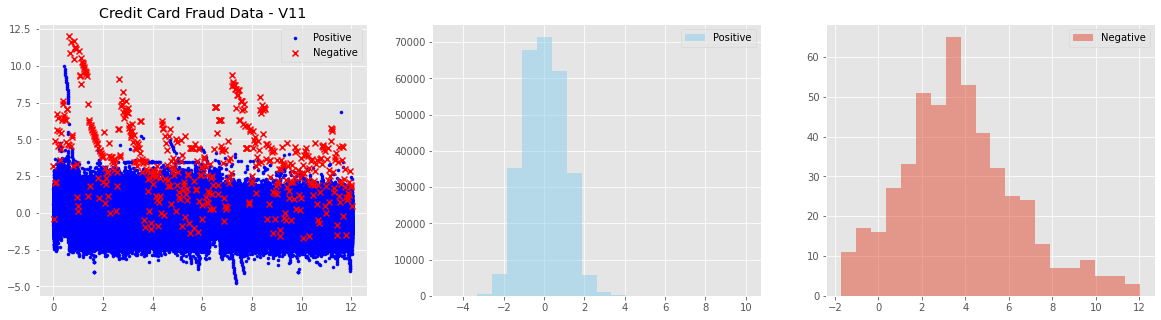

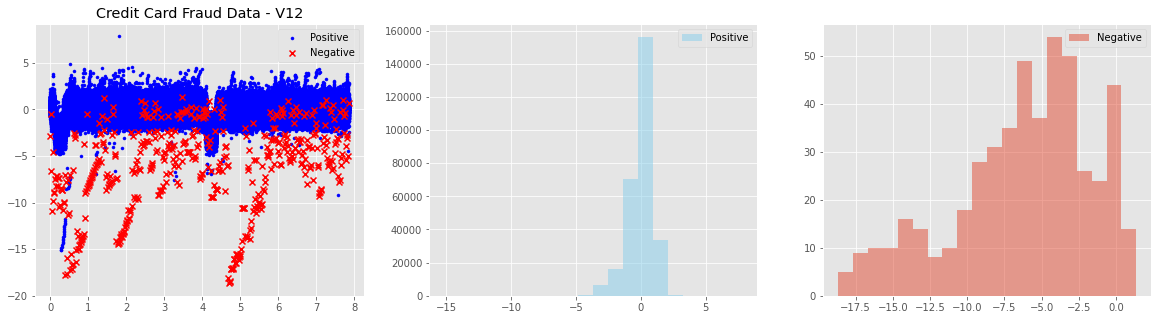

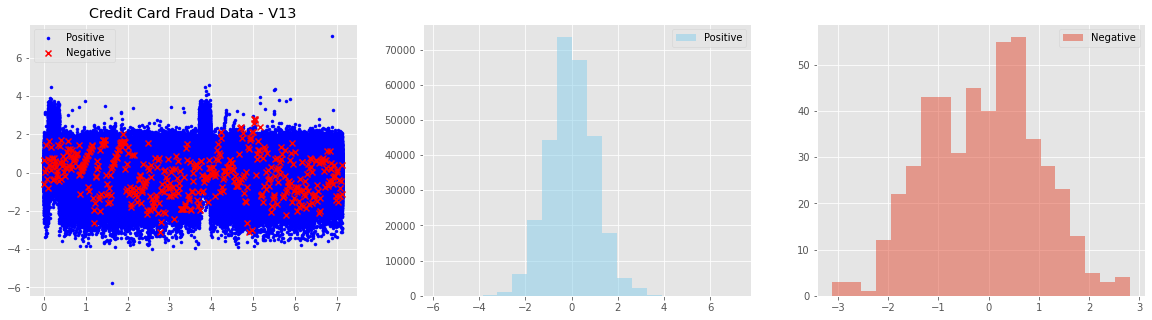

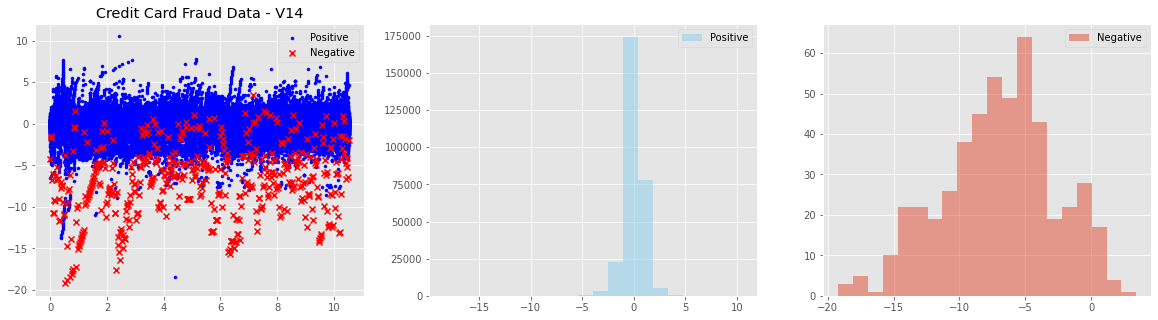

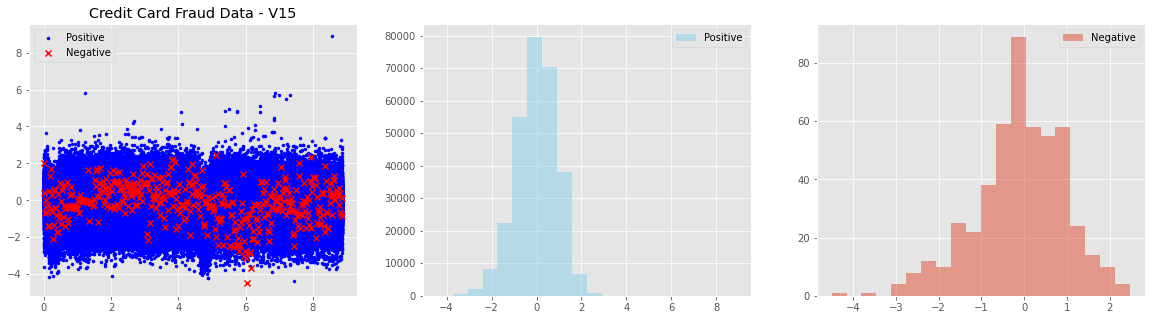

In [0]:
import numpy as np
 
 
def plot_var2(V, V_legend):

  x_1 = V.array[positive_idx]
  y_1 = V.array[negative_idx]

  fig,(ax1,ax2,ax3) = plt.subplots(1,3,  figsize=(20, 5))

  ax1.set(title="Credit Card Fraud Data - "+V_legend)

  maxval = max(V)
  xaxis = np.linspace(0,maxval, max(x_1.shape))
  ax1.scatter(xaxis , list(x_1),label="Positive", c='b', marker='.')

  yaxis = np.linspace(0,maxval, max(y_1.shape))
  ax1.scatter(yaxis, list(y_1), label="Negative", c='r', marker='x')
  ax1.legend()
  plt.style.use('ggplot')
  ax2.hist(list(x_1), bins=20, color = "skyblue", label='Positive', alpha=0.5)
  ax2.legend()
  ax3.hist(list(y_1), bins=20, label='Negative', alpha=0.5)
  ax3.legend()

  plt.legend()
  plt.show()

plot_var2(cf_data.V11, "V11")
plot_var2(cf_data.V12, "V12")
plot_var2(cf_data.V13, "V13")
plot_var2(cf_data.V14, "V14")
plot_var2(cf_data.V15, "V15")




NameError: ignored